In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Combining all files into one master file

In [123]:
data_file_folder ='../data/'
df = []
for file in os.listdir(data_file_folder):
        if file.endswith('.xlsx'):             
             df.append(pd.read_excel(os.path.join(data_file_folder,file),sheet_name='Sheet1'))
df_master = pd.concat(df, axis = 0)

In [124]:
df_master.isna().sum()

Year                                             0
State                                            0
County                                           0
fatalities                                       0
injuries                                         0
total_crashes                                    0
population                                       2
CBSA Title                                    1994
Metropolitan/Micropolitan Statistical Area    1994
dtype: int64

In [125]:
df_master.head(20)

,Year,State,County,fatalities,injuries,total_crashes,population,CBSA Title,Metropolitan/Micropolitan Statistical Area
0,2013,Florida,ALACHUA,33,3321,4651,252475.0,"Gainesville, FL",Metropolitan Statistical Area
1,2013,Florida,BAKER,9,270,293,27009.0,"Jacksonville, FL",Metropolitan Statistical Area
2,2013,Florida,BAY,17,2208,3514,174596.0,"Panama City, FL",Metropolitan Statistical Area
3,2013,Florida,BRADFORD,5,202,220,26802.0,NaN,NaN
4,2013,Florida,BREVARD,76,5041,7079,550255.0,"Palm Bay-Melbourne-Titusville, FL",Metropolitan Statistical Area
5,2013,Florida,BROWARD,180,21580,32595,1836600.0,"Miami-Fort Lauderdale-Pompano Beach, FL",Metropolitan Statistical Area
6,2013,Florida,CALHOUN,1,109,152,14578.0,NaN,NaN
7,2013,Florida,CHARLOTTE,22,1412,2091,164671.0,"Punta Gorda, FL",Metropolitan Statistical Area
8,2013,Florida,CITRUS,17,993,1360,138829.0,"Homosassa Springs, FL",Metropolitan Statistical Area
9,2013,Florida,CLAY,10,1621,2434,195657.0,"Jacksonville, FL",Metropolitan Statistical Area


In [3]:
df_master.to_excel('../data/master_file.xlsx', engine='xlsxwriter',index=False)

NameError: name 'df_master' is not defined

In [ ]:
# df_master_pop_gr = df_master.groupby(["State","CBSA Title","Year","Metropolitan/Micropolitan Statistical Area"])["population"].sum().reset_index()
# df_master_pop_gr.head()
# df_master_pop_gr = pd.pivot(df_master_pop_gr,index=["State","CBSA Title","Metropolitan/Micropolitan Statistical Area"],columns=["Year"]).reset_index()
# df_master_pop_gr
# df_master_pop_gr.to_excel('../data/population.xlsx', engine='xlsxwriter')
# df_master_pop_analysis = df_master_pop_gr.pct_change(axis='columns')
# df_master_pop_analysis
# df_master_pop_analysis

In [4]:
df_master = pd.DataFrame(pd.read_excel('../data/master_file.xlsx'))

In [140]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5402 non-null   int64  
 1   State                                       5402 non-null   object 
 2   County                                      5402 non-null   object 
 3   fatalities                                  5402 non-null   int64  
 4   injuries                                    5402 non-null   int64  
 5   total_crashes                               5402 non-null   int64  
 6   population                                  5400 non-null   float64
 7   CBSA Title                                  3408 non-null   object 
 8   Metropolitan/Micropolitan Statistical Area  3408 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 380.0+ KB


### Analyzing crash data and normalizing it based on population

In [15]:
df_crash_analysis = df_master.groupby(["CBSA Title","Year","Metropolitan/Micropolitan Statistical Area","State"]).agg({"population":"sum","fatalities":"sum","injuries":"sum","total_crashes":"sum"}).reset_index()
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473.0,39,1223,3946
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342.0,35,1126,4169
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688.0,43,1214,4089
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017.0,29,1223,3976
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429.0,34,1296,4295
...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128


In [12]:
df_crash_analysis['Fatalities per 100,000 population'] = round((df_crash_analysis['fatalities'] / df_crash_analysis['population']) * 100000)
df_crash_analysis['Injuries per 100,000 population'] = round((df_crash_analysis['injuries'] / df_crash_analysis['population']) * 100000)
df_crash_analysis['Total Crashes per 100,000 population'] = round((df_crash_analysis['total_crashes'] /df_crash_analysis['population']) * 100000)
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473.0,39,1223,3946,23.0,730.0,2356.0
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342.0,35,1126,4169,21.0,669.0,2477.0
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688.0,43,1214,4089,25.0,715.0,2410.0
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017.0,29,1223,3976,17.0,719.0,2339.0
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429.0,34,1296,4295,20.0,760.0,2520.0
...,...,...,...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446.0,2,46,95,14.0,318.0,658.0
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254.0,0,27,124,0.0,189.0,870.0
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149.0,2,22,127,14.0,155.0,898.0
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179.0,0,51,128,0.0,360.0,903.0


In [145]:
df_crash_analysis.to_excel('../data/crash_analysis.xlsx', engine='xlsxwriter',index=False)

In [14]:
df_crash_analysis_totals = df_crash_analysis.groupby(["CBSA Title","Metropolitan/Micropolitan Statistical Area","State"]).agg({"fatalities":"sum","injuries":"sum","total_crashes":"sum"}).reset_index()
df_crash_analysis_totals

,CBSA Title,Metropolitan/Micropolitan Statistical Area,State,fatalities,injuries,total_crashes
0,"Abilene, TX",Metropolitan Statistical Area,Texas,281,9830,31895
1,"Albany, GA",Metropolitan Statistical Area,Georgia,215,15873,16088
2,"Albemarle, NC",Micropolitan Statistical Area,North Carolina,103,4395,10599
3,"Alice, TX",Micropolitan Statistical Area,Texas,110,2863,7504
4,"Amarillo, TX",Metropolitan Statistical Area,Texas,396,12228,45864
5,"Americus, GA",Micropolitan Statistical Area,Georgia,37,2708,2745
6,"Andrews, TX",Micropolitan Statistical Area,Texas,82,617,2417
7,"Arcadia, FL",Micropolitan Statistical Area,Florida,88,2484,3466
8,"Asheville, NC",Metropolitan Statistical Area,North Carolina,515,34501,89416
9,"Athens, TN",Micropolitan Statistical Area,Tennessee,93,2750,11125


In [8]:
df_crash_analysis_totals['Fatalities per 100,000 population'] = round((df_crash_analysis['fatalities'] / df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals['Injuries per 100,000 population'] = round((df_crash_analysis['injuries'] / df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals['Total Crashes per 100,000 population'] = round((df_crash_analysis['total_crashes'] /df_crash_analysis_totals['population']) * 100000)
df_crash_analysis_totals

,CBSA Title,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",Metropolitan Statistical Area,Texas,1365968.0,281,9830,31895,3.0,90.0,289.0
1,"Albany, GA",Metropolitan Statistical Area,Georgia,1195213.0,215,15873,16088,3.0,94.0,349.0
2,"Albemarle, NC",Micropolitan Statistical Area,North Carolina,491799.0,103,4395,10599,9.0,247.0,831.0
3,"Alice, TX",Micropolitan Statistical Area,Texas,416099.0,110,2863,7504,7.0,294.0,956.0
4,"Amarillo, TX",Metropolitan Statistical Area,Texas,2106923.0,396,12228,45864,2.0,62.0,204.0
5,"Americus, GA",Micropolitan Statistical Area,Georgia,283295.0,37,2708,2745,16.0,465.0,1448.0
6,"Andrews, TX",Micropolitan Statistical Area,Texas,143008.0,82,617,2417,18.0,932.0,2647.0
7,"Arcadia, FL",Micropolitan Statistical Area,Florida,288836.0,88,2484,3466,11.0,380.0,1222.0
8,"Asheville, NC",Metropolitan Statistical Area,North Carolina,3616662.0,515,34501,89416,1.0,45.0,46.0
9,"Athens, TN",Micropolitan Statistical Area,Tennessee,423684.0,93,2750,11125,6.0,426.0,433.0


### Identifying states with the most number of counties that are part of metro area and were affected by population growth the most

In [107]:
df_pop_est = pd.DataFrame(pd.read_excel('../data/raw_data/co-est2020.xlsx'))
df_pop_est = df_pop_est.drop(["SUMLEV","REGION","DIVISION","STATE","CENSUS2010POP","ESTIMATESBASE2010","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016","POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE042020"],axis=1)
df_pop_est = df_pop_est[df_pop_est.COUNTY != 0]
df_pop_est['CTYNAME'] = df_pop_est['CTYNAME'].str.replace("County","").str.strip().str.upper()
df_pop_est.rename(columns = {'CTYNAME':'County'}, inplace = True)
df_pop_est.rename(columns = {'STNAME':'State Name'}, inplace = True)
df_pop_est

,COUNTY,State Name,County,POPESTIMATE2013,POPESTIMATE2020
1,1,Alabama,AUTAUGA,54747,56145
2,3,Alabama,BALDWIN,194978,229287
3,5,Alabama,BARBOUR,26946,24589
4,7,Alabama,BIBB,22510,22136
5,9,Alabama,BLOUNT,57630,57879
...,...,...,...,...,...
3189,37,Wyoming,SWEETWATER,45189,42673
3190,39,Wyoming,TETON,22335,23497
3191,41,Wyoming,UINTA,20969,20215
3192,43,Wyoming,WASHAKIE,8417,7760


In [108]:
metros_df = pd.DataFrame(pd.read_excel('../data/raw_data/metro_areas.xlsx',sheet_name='All_States'))
metros_df['County/County Equivalent'] = metros_df['County/County Equivalent'].str.replace("County","").str.strip().str.upper()
metros_df.rename(columns = {'County/County Equivalent':'County'}, inplace = True)
metros_df

,CBSA Title,Metropolitan/Micropolitan Statistical Area,County,State Name
0,"Aberdeen, SD",Micropolitan Statistical Area,BROWN,South Dakota
1,"Aberdeen, SD",Micropolitan Statistical Area,EDMUNDS,South Dakota
2,"Aberdeen, WA",Micropolitan Statistical Area,GRAYS HARBOR,Washington
3,"Abilene, TX",Metropolitan Statistical Area,CALLAHAN,Texas
4,"Abilene, TX",Metropolitan Statistical Area,JONES,Texas
...,...,...,...,...
1911,"Yuba City, CA",Metropolitan Statistical Area,SUTTER,California
1912,"Yuba City, CA",Metropolitan Statistical Area,YUBA,California
1913,"Yuma, AZ",Metropolitan Statistical Area,YUMA,Arizona
1914,"Zanesville, OH",Micropolitan Statistical Area,MUSKINGUM,Ohio


In [109]:
df = pd.merge(df_pop_est,metros_df,on=(["County",'State Name']), how ="left")
df

,COUNTY,State Name,County,POPESTIMATE2013,POPESTIMATE2020,CBSA Title,Metropolitan/Micropolitan Statistical Area
0,1,Alabama,AUTAUGA,54747,56145,"Montgomery, AL",Metropolitan Statistical Area
1,3,Alabama,BALDWIN,194978,229287,"Daphne-Fairhope-Foley, AL",Metropolitan Statistical Area
2,5,Alabama,BARBOUR,26946,24589,"Eufaula, AL-GA",Micropolitan Statistical Area
3,7,Alabama,BIBB,22510,22136,"Birmingham-Hoover, AL",Metropolitan Statistical Area
4,9,Alabama,BLOUNT,57630,57879,"Birmingham-Hoover, AL",Metropolitan Statistical Area
...,...,...,...,...,...,...,...
3138,37,Wyoming,SWEETWATER,45189,42673,"Rock Springs, WY",Micropolitan Statistical Area
3139,39,Wyoming,TETON,22335,23497,"Jackson, WY-ID",Micropolitan Statistical Area
3140,41,Wyoming,UINTA,20969,20215,"Evanston, WY",Micropolitan Statistical Area
3141,43,Wyoming,WASHAKIE,8417,7760,NaN,NaN


In [110]:
df_new = df.groupby(['County','CBSA Title','Metropolitan/Micropolitan Statistical Area','State Name']).agg({'POPESTIMATE2013':'sum','POPESTIMATE2020':'sum'}).reset_index()
df_new

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020
0,ACADIA PARISH,"Lafayette, LA",Metropolitan Statistical Area,Louisiana,62310,61918
1,ADA,"Boise City, ID",Metropolitan Statistical Area,Idaho,416180,494399
2,ADAIR,"Kirksville, MO",Micropolitan Statistical Area,Missouri,25728,25399
3,ADAMS,"Decatur, IN",Micropolitan Statistical Area,Indiana,34655,35839
4,ADAMS,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,Colorado,469995,519883
...,...,...,...,...,...,...
1836,YORK,"Virginia Beach-Norfolk-Newport News, VA-NC",Metropolitan Statistical Area,Virginia,66046,69199
1837,YORK,"York-Hanover, PA",Metropolitan Statistical Area,Pennsylvania,439041,450448
1838,YUBA,"Yuba City, CA",Metropolitan Statistical Area,California,73082,80160
1839,YUMA,"Yuma, AZ",Metropolitan Statistical Area,Arizona,202447,217824


In [111]:
df_new['TOTALGROWTH'] = round(((df_new['POPESTIMATE2020'] - df_new['POPESTIMATE2013'])/ df_new['POPESTIMATE2013'])*100,1)
df_new

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
0,ACADIA PARISH,"Lafayette, LA",Metropolitan Statistical Area,Louisiana,62310,61918,-0.6
1,ADA,"Boise City, ID",Metropolitan Statistical Area,Idaho,416180,494399,18.8
2,ADAIR,"Kirksville, MO",Micropolitan Statistical Area,Missouri,25728,25399,-1.3
3,ADAMS,"Decatur, IN",Micropolitan Statistical Area,Indiana,34655,35839,3.4
4,ADAMS,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,Colorado,469995,519883,10.6
...,...,...,...,...,...,...,...
1836,YORK,"Virginia Beach-Norfolk-Newport News, VA-NC",Metropolitan Statistical Area,Virginia,66046,69199,4.8
1837,YORK,"York-Hanover, PA",Metropolitan Statistical Area,Pennsylvania,439041,450448,2.6
1838,YUBA,"Yuba City, CA",Metropolitan Statistical Area,California,73082,80160,9.7
1839,YUMA,"Yuma, AZ",Metropolitan Statistical Area,Arizona,202447,217824,7.6


In [112]:
df_metro = df_new.loc[df_new["Metropolitan/Micropolitan Statistical Area"] == "Metropolitan Statistical Area"]
df_metro = df_metro.sort_values(by=["TOTALGROWTH"],ascending = False)
df_metro

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
762,HUDSPETH,"El Paso, TX",Metropolitan Statistical Area,Texas,3333,4906,47.2
1653,TROUSDALE,"Nashville-Davidson--Murfreesboro--Franklin, TN",Metropolitan Statistical Area,Tennessee,7814,11455,46.6
369,COMAL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,118663,164812,38.9
711,HAYS,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,175933,241365,37.2
1551,ST. JOHNS,"Jacksonville, FL",Metropolitan Statistical Area,Florida,209579,278715,33.0
...,...,...,...,...,...,...,...
135,BOONE,"Charleston, WV",Metropolitan Statistical Area,West Virginia,24091,21055,-12.6
608,GEARY,"Manhattan, KS",Metropolitan Statistical Area,Kansas,36857,32218,-12.6
451,DEKALB,"St. Joseph, MO-KS",Metropolitan Statistical Area,Missouri,12638,10944,-13.4
278,CHATTAHOOCHEE,"Columbus, GA-AL",Metropolitan Statistical Area,Georgia,12271,10551,-14.0


In [113]:
top100 = df_metro.nlargest(100,"TOTALGROWTH")
top100

,County,CBSA Title,Metropolitan/Micropolitan Statistical Area,State Name,POPESTIMATE2013,POPESTIMATE2020,TOTALGROWTH
762,HUDSPETH,"El Paso, TX",Metropolitan Statistical Area,Texas,3333,4906,47.2
1653,TROUSDALE,"Nashville-Davidson--Murfreesboro--Franklin, TN",Metropolitan Statistical Area,Tennessee,7814,11455,46.6
369,COMAL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,118663,164812,38.9
711,HAYS,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,175933,241365,37.2
1551,ST. JOHNS,"Jacksonville, FL",Metropolitan Statistical Area,Florida,209579,278715,33.0
860,KAUFMAN,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,Texas,108269,143198,32.3
1795,WILLIAMSON,"Austin-Round Rock-Georgetown, TX",Metropolitan Statistical Area,Texas,470494,617855,31.3
866,KENDALL,"San Antonio-New Braunfels, TX",Metropolitan Statistical Area,Texas,37151,48523,30.6
1605,SUMTER,"The Villages, FL",Metropolitan Statistical Area,Florida,106980,139018,29.9
1435,ROCKWALL,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,Texas,84732,109888,29.7


In [115]:
df_final_list = top50.groupby(['State Name'])['County'].count().reset_index()
df_final_list = df_final_list.sort_values(by='County', ascending=False)
df_final_list

,State Name,County
18,Texas,24
5,Florida,15
6,Georgia,11
11,North Carolina,9
17,Tennessee,7
19,Utah,5
3,Colorado,5
15,South Carolina,5
7,Idaho,4
20,Virginia,3


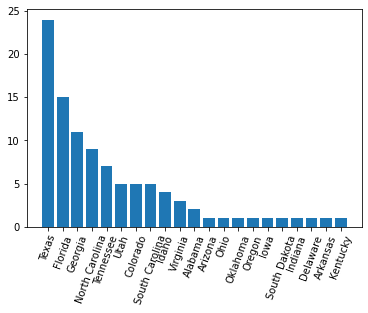

In [119]:
plt.bar("State Name","County",data=df_final_list)
plt.xticks(rotation = 70)
plt.show()

In [61]:
# df_new.to_excel('../data/df_change.xlsx',index=False,engine='xlsxwriter')

In [147]:
df_crash_analysis= pd.DataFrame(pd.read_excel('../data/crash_analysis.xlsx'))
df_crash_analysis

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
0,"Abilene, TX",2013,Metropolitan Statistical Area,Texas,167473,39,1223,3946,23,730,2356
1,"Abilene, TX",2014,Metropolitan Statistical Area,Texas,168342,35,1126,4169,21,669,2477
2,"Abilene, TX",2015,Metropolitan Statistical Area,Texas,169688,43,1214,4089,25,715,2410
3,"Abilene, TX",2016,Metropolitan Statistical Area,Texas,170017,29,1223,3976,17,719,2339
4,"Abilene, TX",2017,Metropolitan Statistical Area,Texas,170429,34,1296,4295,20,760,2520
...,...,...,...,...,...,...,...,...,...,...,...
1635,"Zapata, TX",2016,Micropolitan Statistical Area,Texas,14446,2,46,95,14,318,658
1636,"Zapata, TX",2017,Micropolitan Statistical Area,Texas,14254,0,27,124,0,189,870
1637,"Zapata, TX",2018,Micropolitan Statistical Area,Texas,14149,2,22,127,14,155,898
1638,"Zapata, TX",2019,Micropolitan Statistical Area,Texas,14179,0,51,128,0,360,903


In [148]:
df_top5_metro = pd.DataFrame(pd.read_excel('../data/cleaned_data/population.xlsx', sheet_name = "top5_metro" ))
df_top5_micro = pd.DataFrame(pd.read_excel('../data/cleaned_data/population.xlsx', sheet_name = "top5_micro" ))

In [149]:
df_top5_metro

,State,Metropolitan/Micropolitan Statistical Area,CBSA Title,Total Growth
0,FL,Metropolitan Statistical Area,"Cape Coral-Fort Myers, FL",15.889603
1,FL,Metropolitan Statistical Area,"Jacksonville, FL",15.641667
2,FL,Metropolitan Statistical Area,"Lakeland-Winter Haven, FL",17.120840
3,FL,Metropolitan Statistical Area,"Orlando-Kissimmee-Sanford, FL",17.952038
4,FL,Metropolitan Statistical Area,"The Villages, FL",22.450373
5,GA,Metropolitan Statistical Area,"Athens-Clarke County, GA",9.134065
6,GA,Metropolitan Statistical Area,"Atlanta-Sandy Springs-Alpharetta, GA",10.717953
7,GA,Metropolitan Statistical Area,"Gainesville, GA",9.203405
8,GA,Metropolitan Statistical Area,"Savannah, GA",10.942118
9,GA,Metropolitan Statistical Area,"Warner Robins, GA",10.068178


In [150]:
df_top5_micro

,State,Metropolitan/Micropolitan Statistical Area,CBSA Title,Total Growth
0,FL,Micropolitan Statistical Area,"Clewiston, FL",5.019969
1,FL,Micropolitan Statistical Area,"Key West, FL",9.227969
2,FL,Micropolitan Statistical Area,"Lake City, FL",3.666731
3,FL,Micropolitan Statistical Area,"Okeechobee, FL",0.402715
4,FL,Micropolitan Statistical Area,"Palatka, FL",1.350007
5,GA,Micropolitan Statistical Area,"Bainbridge, GA",7.108174
6,GA,Micropolitan Statistical Area,"Cornelia, GA",6.838300
7,GA,Micropolitan Statistical Area,"Jefferson, GA",25.207286
8,GA,Micropolitan Statistical Area,"St. Marys, GA",6.822426
9,GA,Micropolitan Statistical Area,"Statesboro, GA",13.314582


In [151]:
metro = df_top5_metro["CBSA Title"].tolist()
micro = df_top5_micro["CBSA Title"].tolist()

In [152]:
metro

['Cape Coral-Fort Myers, FL',
 'Jacksonville, FL',
 'Lakeland-Winter Haven, FL',
 'Orlando-Kissimmee-Sanford, FL',
 'The Villages, FL',
 'Athens-Clarke County, GA',
 'Atlanta-Sandy Springs-Alpharetta, GA',
 'Gainesville, GA',
 'Savannah, GA',
 'Warner Robins, GA',
 'Burlington, NC',
 'Charlotte-Concord-Gastonia, NC-SC',
 'Durham-Chapel Hill, NC',
 'Myrtle Beach-Conway-North Myrtle Beach, SC-NC',
 'Raleigh-Cary, NC',
 'Chattanooga, TN-GA',
 'Clarksville, TN-KY',
 'Cleveland, TN',
 'Knoxville, TN',
 'Nashville-Davidson--Murfreesboro--Franklin, TN',
 'Austin-Round Rock-Georgetown, TX',
 'College Station-Bryan, TX',
 'Dallas-Fort Worth-Arlington, TX',
 'Houston-The Woodlands-Sugar Land, TX',
 'San Antonio-New Braunfels, TX']

In [153]:
micro

['Clewiston, FL',
 'Key West, FL',
 'Lake City, FL',
 'Okeechobee, FL',
 'Palatka, FL',
 'Bainbridge, GA',
 'Cornelia, GA',
 'Jefferson, GA',
 'St. Marys, GA',
 'Statesboro, GA',
 'Boone, NC',
 'Cullowhee, NC',
 'Kill Devil Hills, NC',
 'Pinehurst-Southern Pines, NC',
 'Sanford, NC',
 'Cookeville, TN',
 'Crossville, TN',
 'Lewisburg, TN',
 'Shelbyville, TN',
 'Tullahoma-Manchester, TN',
 'Andrews, TX',
 'Corsicana, TX',
 'Gainesville, TX',
 'Granbury, TX',
 'Huntsville, TX']

In [161]:
df_crash_analysis_top5_metro = df_crash_analysis[df_crash_analysis["CBSA Title"].isin(metro)]
df_crash_analysis_top5_micro = df_crash_analysis[df_crash_analysis["CBSA Title"].isin(micro)]

In [162]:
df_crash_analysis_top5_metro

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
88,"Athens-Clarke County, GA",2013,Metropolitan Statistical Area,Georgia,197590,24,2518,2542,12,1274,1287
89,"Athens-Clarke County, GA",2014,Metropolitan Statistical Area,Georgia,198361,23,2442,2465,12,1231,1243
90,"Athens-Clarke County, GA",2015,Metropolitan Statistical Area,Georgia,202565,28,2793,2821,14,1379,1393
91,"Athens-Clarke County, GA",2016,Metropolitan Statistical Area,Georgia,205402,28,2825,2853,14,1375,1389
92,"Athens-Clarke County, GA",2017,Metropolitan Statistical Area,Georgia,209106,17,2854,2871,8,1365,1373
93,"Athens-Clarke County, GA",2018,Metropolitan Statistical Area,Georgia,211468,26,2351,2377,12,1112,1124
94,"Athens-Clarke County, GA",2019,Metropolitan Statistical Area,Georgia,213750,23,2750,2773,11,1287,1297
95,"Athens-Clarke County, GA",2020,Metropolitan Statistical Area,Georgia,215638,30,2380,2410,14,1104,1118
96,"Atlanta-Sandy Springs-Alpharetta, GA",2013,Metropolitan Statistical Area,Georgia,5510530,527,70868,71395,10,1286,1296
97,"Atlanta-Sandy Springs-Alpharetta, GA",2014,Metropolitan Statistical Area,Georgia,5593204,479,71516,71995,9,1279,1287


In [163]:
df_crash_analysis_top5_micro

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
48,"Andrews, TX",2013,Micropolitan Statistical Area,Texas,16779,12,80,294,72,477,1752
49,"Andrews, TX",2014,Micropolitan Statistical Area,Texas,17435,11,87,366,63,499,2099
50,"Andrews, TX",2015,Micropolitan Statistical Area,Texas,18072,14,31,225,77,172,1245
51,"Andrews, TX",2016,Micropolitan Statistical Area,Texas,17791,1,44,218,6,247,1225
52,"Andrews, TX",2017,Micropolitan Statistical Area,Texas,17603,16,61,218,91,347,1238
53,"Andrews, TX",2018,Micropolitan Statistical Area,Texas,18011,9,112,380,50,622,2110
54,"Andrews, TX",2019,Micropolitan Statistical Area,Texas,18705,15,118,387,80,631,2069
55,"Andrews, TX",2020,Micropolitan Statistical Area,Texas,18612,4,84,329,21,451,1768
120,"Bainbridge, GA",2013,Micropolitan Statistical Area,Georgia,27391,10,232,242,37,847,884
121,"Bainbridge, GA",2014,Micropolitan Statistical Area,Georgia,27167,10,320,330,37,1178,1215


In [166]:
frames = [df_crash_analysis_top5_metro,df_crash_analysis_top5_micro]
df_crash_analysis_top5 = pd.concat(frames)
df_crash_analysis_top5

,CBSA Title,Year,Metropolitan/Micropolitan Statistical Area,State,population,fatalities,injuries,total_crashes,"Fatalities per 100,000 population","Injuries per 100,000 population","Total Crashes per 100,000 population"
88,"Athens-Clarke County, GA",2013,Metropolitan Statistical Area,Georgia,197590,24,2518,2542,12,1274,1287
89,"Athens-Clarke County, GA",2014,Metropolitan Statistical Area,Georgia,198361,23,2442,2465,12,1231,1243
90,"Athens-Clarke County, GA",2015,Metropolitan Statistical Area,Georgia,202565,28,2793,2821,14,1379,1393
91,"Athens-Clarke County, GA",2016,Metropolitan Statistical Area,Georgia,205402,28,2825,2853,14,1375,1389
92,"Athens-Clarke County, GA",2017,Metropolitan Statistical Area,Georgia,209106,17,2854,2871,8,1365,1373
93,"Athens-Clarke County, GA",2018,Metropolitan Statistical Area,Georgia,211468,26,2351,2377,12,1112,1124
94,"Athens-Clarke County, GA",2019,Metropolitan Statistical Area,Georgia,213750,23,2750,2773,11,1287,1297
95,"Athens-Clarke County, GA",2020,Metropolitan Statistical Area,Georgia,215638,30,2380,2410,14,1104,1118
96,"Atlanta-Sandy Springs-Alpharetta, GA",2013,Metropolitan Statistical Area,Georgia,5510530,527,70868,71395,10,1286,1296
97,"Atlanta-Sandy Springs-Alpharetta, GA",2014,Metropolitan Statistical Area,Georgia,5593204,479,71516,71995,9,1279,1287


In [167]:
df_crash_analysis_top5.to_excel('../data/crash_analysis_top5.xlsx',index=False,engine='xlsxwriter')